<a href="https://colab.research.google.com/github/kahingala/Colab/blob/main/Dl_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports and plotting style
import numpy as np


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Step 1B: If your CSV is in Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Replace the path below with your actual file path in Drive
csv_path = "/content/drive/MyDrive/Au_nanoParticle_dataset/Au_nanoparticle_dataset.csv"
df = pd.read_csv(csv_path)
print("Loaded shape:", df.shape)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loaded shape: (4000, 185)


,ID,T,tau,time,N_total,N_bulk,N_surface,Volume,R_min,R_max,...,q6q6_S14,q6q6_S15,q6q6_S16,q6q6_S17,q6q6_S18,q6q6_S19,q6q6_S20,q6q6_S20+,Total_E,Formation_E
0,1,273,0.000025,1,1599,1014,585,2.710000e-26,15.5898,19.4516,...,0,0,0,0,0,0,0,0,-5908.6345,343.4555
1,2,273,0.000025,2,1642,1034,608,2.780000e-26,15.3996,24.1755,...,0,0,0,0,0,0,0,0,-6035.4034,384.8166
2,3,273,0.000025,3,4637,3365,1272,7.850000e-26,21.9199,31.0305,...,0,0,0,0,0,0,0,0,-17330.1660,800.5040
3,4,273,0.000025,4,7189,5292,1897,1.220000e-25,23.2542,37.8795,...,0,0,0,0,0,0,0,0,-26937.2010,1171.7890
4,5,273,0.000025,5,11004,8508,2496,1.860000e-25,27.1200,39.7614,...,0,0,0,0,0,0,0,0,-41427.9010,1597.7390


In [ ]:
# Step 2: Keep only these features
cols = ['N_total', 'N_bulk', 'N_surface', 'R_avg']

# Optional: check columns exist and show you what's available if not
missing = [c for c in cols if c not in df.columns]
if missing:
    print("⚠️ Missing expected columns:", missing)
    print("Available columns are:", list(df.columns))
else:
    new_df = df[cols].copy()

# Clean: drop rows with any missing values in these columns (helps plots)
new_df = new_df.dropna(subset=cols)
print("New DF shape:", new_df.shape)
new_df.head()


New DF shape: (4000, 4)


,N_total,N_bulk,N_surface,R_avg
0,1599,1014,585,17.3706
1,1642,1034,608,17.6061
2,4637,3365,1272,25.3692
3,7189,5292,1897,29.7011
4,11004,8508,2496,34.2831


In [ ]:
new_df.head(20)

,N_total,N_bulk,N_surface,R_avg
0,1599,1014,585,17.3706
1,1642,1034,608,17.6061
2,4637,3365,1272,25.3692
3,7189,5292,1897,29.7011
4,11004,8508,2496,34.2831
5,13375,10768,2607,36.6334
6,13795,11155,2640,37.0108
7,13947,11304,2643,37.1672
8,14020,11357,2663,37.2103
9,14056,11389,2667,37.2467


In [ ]:
# Step 4: Summary stats
means = new_df.mean()
stds  = new_df.std()
quants = new_df.quantile([0.25, 0.5, 0.75])

print("=== Mean ===")
print(means, "\n")
print("=== Standard Deviation ===")
print(stds, "\n")
print("=== Quartiles (25%, 50%, 75%) ===")
print(quants)

# (Optional) One tidy table:
summary = pd.concat(
    [means.rename("mean"), stds.rename("std"), quants.rename({0.25:"25%", 0.5:"50%", 0.75:"75%"})],
    axis=1
)
summary


=== Mean ===
N_total      3476.786500
N_bulk       2521.550250
N_surface     955.236250
R_avg          20.654363
dtype: float64 

=== Standard Deviation ===
N_total      3679.286769
N_bulk       2976.232459
N_surface     721.870220
R_avg           7.610716
dtype: float64 

=== Quartiles (25%, 50%, 75%) ===
      N_total   N_bulk  N_surface      R_avg
0.25   1061.0   618.75     437.00  15.160725
0.50   1867.0  1199.00     666.00  18.629250
0.75   4503.0  3183.00    1301.75  25.525125


,mean,std,N_total,N_bulk,N_surface,R_avg
N_total,3476.786500,3679.286769,NaN,NaN,NaN,NaN
N_bulk,2521.550250,2976.232459,NaN,NaN,NaN,NaN
N_surface,955.236250,721.870220,NaN,NaN,NaN,NaN
R_avg,20.654363,7.610716,NaN,NaN,NaN,NaN
25%,NaN,NaN,1061.0,618.75,437.00,15.160725
50%,NaN,NaN,1867.0,1199.00,666.00,18.629250
75%,NaN,NaN,4503.0,3183.00,1301.75,25.525125


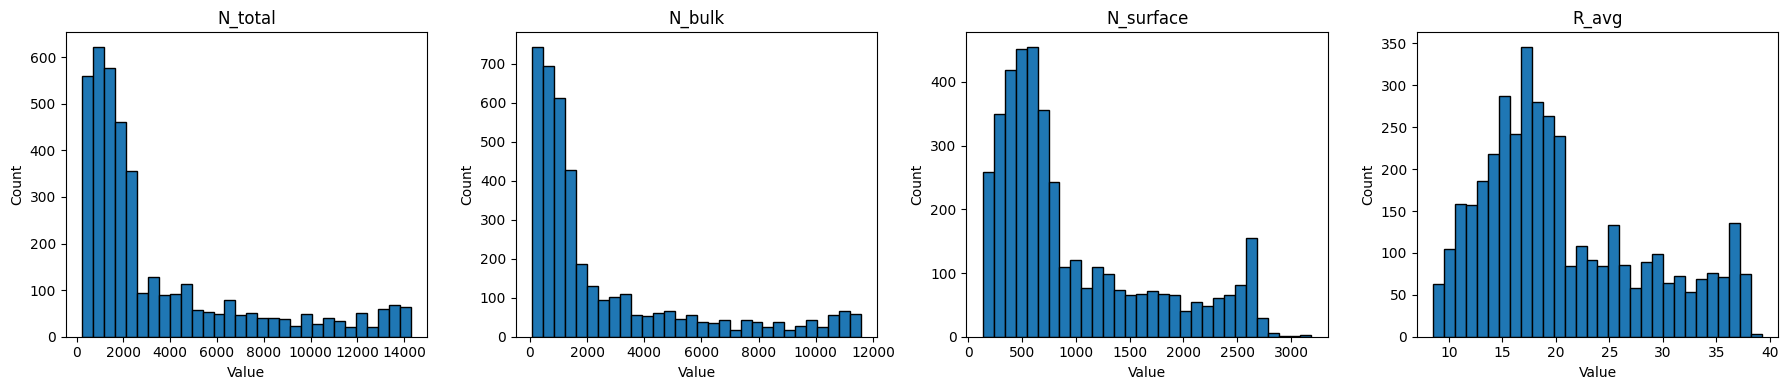

In [ ]:
# Step 5: 1x4 hist layout
fig, axes = plt.subplots(1, 4, figsize=(18, 4))

for ax, col in zip(axes, new_df.columns):
    ax.hist(new_df[col], bins=30, edgecolor='black')
    ax.set_title(col)
    ax.set_xlabel("Value")
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()


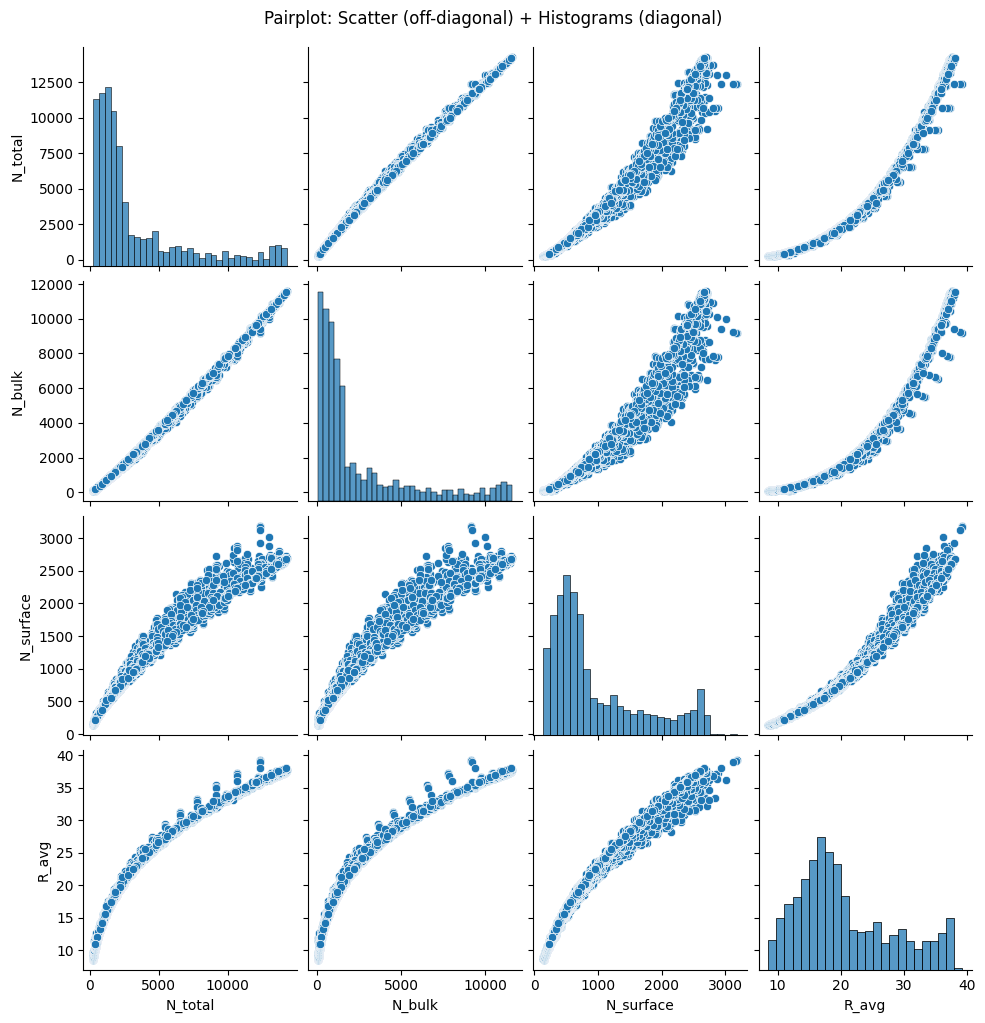

In [ ]:
# Step 6.1: Simple pairplot
sns.pairplot(new_df, diag_kind="hist")
plt.suptitle("Pairplot: Scatter (off-diagonal) + Histograms (diagonal)", y=1.02)
plt.show()


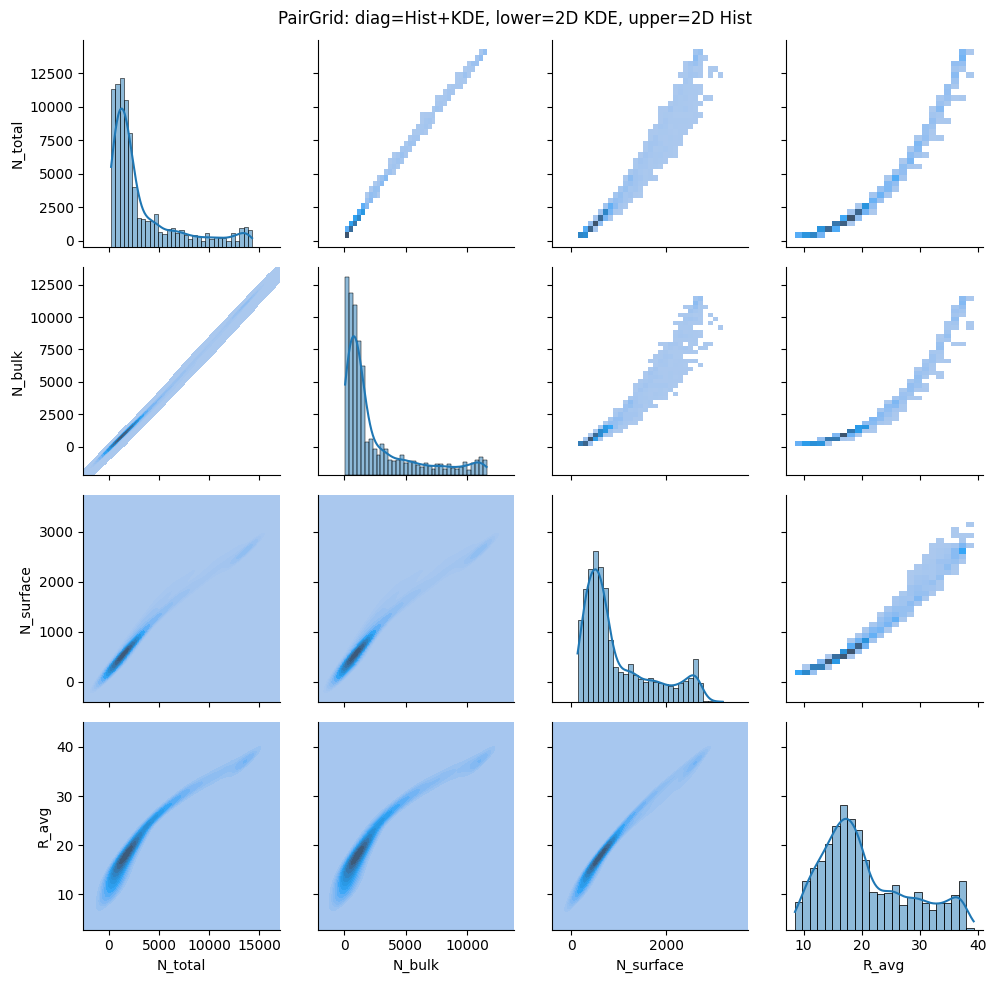

In [ ]:
# Step 6.2: Customized PairGrid
g = sns.PairGrid(new_df)

# Upper triangle: 2D histogram
g.map_upper(sns.histplot)

# Diagonal: histogram + KDE
g.map_diag(sns.histplot, kde=True)

# Lower triangle: bivariate KDE (smooth density)
g.map_lower(sns.kdeplot, fill=True, thresh=0, levels=15)

# Improve spacing
plt.subplots_adjust(top=0.95)
g.fig.suptitle("PairGrid: diag=Hist+KDE, lower=2D KDE, upper=2D Hist")
plt.show()
